- Reference 1: Kaggle Kernel [Code sharing, 13th place, no external data](https://www.kaggle.com/c/rossmann-store-sales/discussion/17979)
- Reference 2: Kaggle Kernel-[A Journey through Rossmann Stores](https://www.kaggle.com/omarelgabry/rossmann-store-sales/a-journey-through-rossmann-stores)
- Reference 3: Kaggle Kernel-[Predict_sales_with_pandas](https://www.kaggle.com/zygmunt/rossmann-store-sales/predict-sales-with-pandas-py)

# 机器学习纳米学位
## 毕业项目开题报告
赵鹏举  
2017-03-16

## Rossmann药店销售额预测
### 项目背景
销售预测对于每一个企业都非常重要，机器学习的方法在其中得到了非常广泛的应用，掌握进行预测的常用方法和工作流程对于以后从事数据分析工作有着巨大的现实意义。

本项目来自Kaggle比赛[Rossman Store Sales](https://www.kaggle.com/c/rossmann-store-sales#description).  截至2015年，Rossmann在欧洲7个国家运行着超过3000家连锁药店，这些药店的营收会受到促销、竞争者、国家和学校假期、季节、地域等因素的影响。Rossmann希望参加比赛项目的选手，可以准确地地预测出位于德国1115家药店在六周内每天的销售情况；进而利用可靠的销售预测情况帮助药店经理制定更加高效的工作安排。

比赛过程中，第一名[Gert](https://kaggle2.blob.core.windows.net/forum-message-attachments/102102/3454/Rossmann_nr1_doc.pdf)在原有数据集基础上，构造出临近信息、时间信息、趋势信息等特征，并采用XGBoost方法训练模型；第三名[Cheng Guo](https://arxiv.org/pdf/1604.06737.pdf) 将原本主要用于自然语言处理的深度学习entity embedding模型应用到类别特征中，取得第三名。

### 问题描述
本问题为监督学习中的回归问题：已知1115家药店的信息以及每家药店在2年多时间内每天的销售情况，需要对接下来6周内每家药店的销售状况进行预测。回归问题的常见机器学习方法有K近邻学习、线性回归、决策树、随机森林、XGBoost、神经网络等；而实际中，为了训练出效果较好的模型，一般需要根据数据集的特点，进行特征工程，构造出有用的新特征，并对特征进行选择，同时注意防止过拟合。

在本问题提供的数据集中，销售数据作为标记值，其他属性作为特征，对选择的模型进行训练；模型的预测销售数据与标记销售数据之间的差异可以用来对模型进行评估；训练好的模型，对测试数据的预测是可以再现的。

### 输入数据
输入数据包含 train.csv和store.csv：

- train.csv是历史销售数据，每条信息包含了药店编号、日期、星期几、是否营业、是否节假日、是否促销、当日销售额以及客户数量；
- store.csv是药店补充数据，每条信息包含了点药店编号、药店类型、商品组合、最近竞争者距离及开店时间、促销有无、促销间隔和开始时间。

输入的数据对于药店销售预测是非常有用的：日期和星期几等可以提供销售额周期性的时间标定；是否节假日和促销，以及每家药店的信息和竞争者的信息，对于销售额也会有一定影响。

### 解决办法
本项目将尝试三种方法进行最终预测：

- 方法1：采用XGBoost方法；XGBoost模型是一种有监督的集成学习方法，可以直观理解为对决策树的集成，是非常有效的解决非结构化数据的方法，在Kaggle比赛中得到广泛的应用；
- 方法2：采用Entity Embedding方法；Entity Embedding属于深度学习中处理自然语言的重要方法，用来表示不同单词之间的关系，本文将用来研究不同特征之间的关系。
- 方法3：前两种方法的集成；

本项目将基于python进行实现，将会主要用到numpy、pandas、matplotlib、seaborn、sklearn、XGBoost、TensorFlow、Keras等函数库。

### 基准模型
本项目将采用两个基准模型：

- 基准一：具有相同特征参数数据子集的中位数；采用的特征包含药店编号、星期几、是否促销、药店类型、商品组合、是否节假日等；
- 基准二：Kaggle Private/Public Leader Board；Kaggle Leader Borad记录了参赛者的预测结果和最终名次，所以可用来衡量本项目能够达到怎样的最终预测结果；Public Leader Board使用了33%测试数据的预测结果，而Private Leader Board使用了67%测试数据的预测结果。

为了避免对测试数据的过拟合而导致的效果提升，本项目在完成过程中，将主要根据输入数据中划分出来的验证集对模型进行评估和优化，用Public Leader Board作为训练过程中过拟合的验证手段，仅在最终用Private Leader Board对结果进行评估。

### 评估指标
本项目采用Kaggle比赛的评估指标：RMSPE（误差百分比的均方差），可表示为
$$
RMSPE= \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\frac{y_i-\hat{y_i}}{y_i})^2}
$$
其中，任何当天销售额为0的数据在评估时将被忽略； $y_i$ 表示某药店在某天的实际销售额，而$\hat{y_i}$ 表示该药店在对应这一天的预测销售额。

### 设计大纲
工作流程：

1. 数据读入：将train.csv、store.csv、test.csv读入
2. 数据可视化：针对不同的特征，对数据进行可视化；
   1. 展示不同分类特征（如星期几、节假日、促销、药店类型、商品组合等）对于销售额的影响
   2. 展示时间序列对于对于销售额的影响，比如指定店铺随着时间的销售额变化、不同因素（促销、装修、竞争等）产生的销售额变化；
   3. 观察是否有异常数据
   4. 展示不同特征之间的相关性
3. 数据整理和特征工程
   1. 对数据中缺失值、异常值进行处理
   2. 分析数据的相关性，并进行数据降维处理
   3. 进行数据聚类分析
   4. 根据需要，对数据进行清理（如归一化、采用对数处理改善分布状况）、聚合
   5. 构造更多的特征（如更详细时间信息、趋势信息等）
4. 训练基准模型
   1. 划分训练集、验证集、测试集
   2. 训练并评估基准模型
5. 训练XGBoost模型
   1. 进行特征选择，找出效果较好的特征组合；
   2. 训练不同的模型
   3. 对较好的模型进行集成
   4. 评估模型
6. 训练、评估、优化entity embedding模型
   1. 选择合适的特征，搭建entity embedding模型
   2. 搭建神经网络模型
   3. 训练、评估、优化模型及特征选择
7. 对XGBoost模型和entity embedding模型进行集成，并评估
8. 结果分析并完成报告



## 准备工作
### 0.1 调入库函数

In [1]:
#基本计算类
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

#可视化
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 

#机器学习库函数
import sklearn
import tensorflow as tf
import keras
import xgboost as xgb


#时间类
import time
import datetime
from isoweek import Week

#文件类
import os

#其他
import itertools
import operator

#基本设定
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline
sns.set_style('whitegrid')

Using TensorFlow backend.


### 0.2 定义评估指标
本项目采用Kaggle比赛的评估指标：RMSPE（误差百分比的均方差），可表示为
$$
RMSPE= \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\frac{y_i-\hat{y_i}}{y_i})^2}
$$
其中，任何当天销售额为0的数据在评估时将被忽略； $y_i$ 表示某药店在某天的实际销售额，而$\hat{y_i}$ 表示该药店在对应这一天的预测销售额。

### 0.3 Setting seed

In [2]:
seed=42

## 1. 读入数据，基本数据处理 & 预览数据

### 1.1 读入数据 

In [3]:
train_raw_df=pd.read_csv('data/train.csv',low_memory=False)
test_raw_df=pd.read_csv('data/test.csv',low_memory=False)
store_raw_df=pd.read_csv('data/store.csv',low_memory=False)

### 1.2  train_raw_df，test_raw_df数据处理
#### 1.2.1 train_raw_df，test_raw_df的时间数据处理
- Year,Month,Day
- DaysThisYear

In [4]:
#将str格式Date转换为datetime64格式Date
train_raw_df['Date_time']=pd.to_datetime(train_raw_df['Date'])
#提取int格式的Year，Month，Day
var_name='Date_time'
train_raw_df['Year']=( pd.Index(train_raw_df[var_name]).year).astype(np.int64)
train_raw_df['Month']=( pd.Index(train_raw_df[var_name]).month).astype(np.int64)
train_raw_df['Day']=( pd.Index(train_raw_df[var_name]).day).astype(np.int64)
train_raw_df['Year-Month']=train_raw_df['Date'].apply(lambda x:(str(x)[:7]))

#将Month转换为string
month2str={
    1:'Jan',2:'Feb',3:'Mar',4:'Apr',
    5:'May',6:'Jun',7:'Jul',8:'Aug',
    9:'Sept',10:'Oct',11:'Nov',12:'Dec'
}
train_raw_df['Month-Str']=train_raw_df['Month'].map(month2str)
train_raw_df['DayOfYear']=train_raw_df.Date_time.dt.dayofyear

In [5]:
#将str格式Date转换为datetime64格式Date
test_raw_df['Date_time']=pd.to_datetime(test_raw_df['Date'])
#提取int格式的Year，Month，Day
var_name='Date_time'
test_raw_df['Year']=( pd.Index(test_raw_df[var_name]).year).astype(np.int64)
test_raw_df['Month']=( pd.Index(test_raw_df[var_name]).month).astype(np.int64)
test_raw_df['Day']=( pd.Index(test_raw_df[var_name]).day).astype(np.int64)
test_raw_df['Year-Month']=test_raw_df['Date'].apply(lambda x:(str(x)[:7]))
#将Month转换为string
month2str={
    1:'Jan',2:'Feb',3:'Mar',4:'Apr',
    5:'May',6:'Jun',7:'Jul',8:'Aug',
    9:'Sept',10:'Oct',11:'Nov',12:'Dec'
}
test_raw_df['Month-Str']=test_raw_df['Month'].map(month2str)

#### 1.2.2 处理test_raw_df Open特征的缺失值
- 由评估指标 RMSPE（误差百分比的均方差）的定义可知，RMSPE仅与非零Sales有关；同时考虑到所有Open=0时，Sales也为0，那么将Open的缺失值全部设置为1，将不会引入新的误差：
    - 如果缺失值对应的实际Sales为零，那么即使预测Sales非零，也不会被计算入RMSPE；
    - 如果缺失值对应的实际Sales非零，那么预测Sales将会被计算入RMSPE；

In [6]:
test_raw_df['Open'].fillna(1,inplace=True)

#### 1.2.3 将train_raw_df中的Sales转换为SalesLog

In [7]:
train_raw_df['SalesLog']=np.log1p(train_raw_df['Sales'])

#### 1.2.4 将train_raw_df，test_raw_df的StateHoliday转换为分类数据

In [8]:
StateHoliday_dict={
    '0':0, 'a':1, 'b':2, 'c':3
}
train_raw_df['StateHoliday_cat']=train_raw_df['StateHoliday'].map(StateHoliday_dict)
test_raw_df['StateHoliday_cat']=test_raw_df['StateHoliday'].map(StateHoliday_dict)

#### 1.2.5 train_raw_df异常值处理
- 在模型训练过程中，使用高质量的训练数据是非常重要的，其中一个重要方面是要剔除异常值
- 使用MAD（median absolute deviation）方法来标记异常值

In [10]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh
for i in train_raw_df['Store'].unique():
    train_raw_df.loc[(train_raw_df['Store'] == i) & (train_raw_df['Open'] == 1), 'Outlier_3'] = \
        mad_based_outlier(train_raw_df.loc[ (train_raw_df['Store'] == i) & (train_raw_df['Open'] == 1)]['Sales'], 3)

In [11]:
for i in train_raw_df['Store'].unique():
    train_raw_df.loc[(train_raw_df['Store'] == i) & (train_raw_df['Open'] == 1), 'Outlier_2'] = \
        mad_based_outlier(train_raw_df.loc[ (train_raw_df['Store'] == i) & (train_raw_df['Open'] == 1)]['Sales'], 2)

In [12]:
for i in train_raw_df['Store'].unique():
    train_raw_df.loc[(train_raw_df['Store'] == i) & (train_raw_df['Open'] == 1), 'Outlier_2_5'] = \
        mad_based_outlier(train_raw_df.loc[ (train_raw_df['Store'] == i) & (train_raw_df['Open'] == 1)]['Sales'], 2.5)


### 1.3 store_raw_df数据处理
#### 1.3.1 store_raw_df的Competition数据处理
- 目的：
    - store_raw_df中添加特征InCompetition，CompetitionSinceDate
    - store_raw_df中CompetitionDistance为NaN的设为CompetitionDistance最大值的10倍
- 通过验证可知，CompetitionOpenSinceYear与CompetitionOpenSinceMonth同时为NaN or 非NaN
- 如果CompetitionDistance 或者CompetitionOpenSinceMonth/Year其中一个不为NaN，则认为该store的InCompetition为True;
- 对于CompetitionDistance不为NaN，而CompetitionOpenSinceMonth为NaN的store，**假设**认为Competition开始时间太早而无法统计到，将其统一设置为CompetitionOpenSinceMonth/Year的最早值1961-01-01
- 对于CompetitionDistance为NaN的store，**假设** CompetitionOpenSinceMonth /Year 设定为一个在test样本之后的日期2016-01-01

In [13]:
print("count of CompetitionOpenSinceYear!=CompetitionOpenSinceMonth is {}".format(
        np.sum(store_raw_df.CompetitionOpenSinceYear.isnull()!=store_raw_df.CompetitionOpenSinceMonth.isnull()
              )))

#如果CompetitionDistance 或者CompetitionOpenSinceMonth/Year其中一个不为NaN，则认为该store的InCompetition为True
store_raw_df['InCompetition']=np.logical_or(
        store_raw_df.CompetitionDistance.notnull(),
        store_raw_df.CompetitionOpenSinceMonth.notnull())

count of CompetitionOpenSinceYear!=CompetitionOpenSinceMonth is 0


In [14]:
# 将所有为NaN的CompetitionOpenSinceMonth/Year设置为1961-01-01
store_raw_df['CompetitionOpenSinceMonth'].fillna(1,inplace=True)
store_raw_df['CompetitionOpenSinceYear'].fillna(1961,inplace=True)
# 将CompetitionOpenSinceMonth/Year格式改为np.int64
store_raw_df['CompetitionOpenSinceMonth']=store_raw_df['CompetitionOpenSinceMonth'].astype(np.int64)
store_raw_df['CompetitionOpenSinceYear']=store_raw_df['CompetitionOpenSinceYear'].astype(np.int64)
# 将CompetitionDistance为NaN的CompetitionOpenSinceMonth/Year设置为2016-01-01
store_raw_df.loc[store_raw_df['CompetitionDistance'].isnull(),'CompetitionOpenSinceYear']=2016

for index, row in store_raw_df.iterrows():
    store_raw_df.loc[index,'CompetitionSinceDate']=(pd.to_datetime(str(row['CompetitionOpenSinceYear'])+'-'+str(row['CompetitionOpenSinceMonth'])+'-'+str(1)))

In [15]:
# store_raw_df中CompetitionDistance为NaN的设为CompetitionDistance最大值的10倍
store_raw_df['CompetitionDistance'].fillna(store_raw_df['CompetitionDistance'].max()*10.0,inplace=True)

#### 1.3.2 store_raw_df的Promo数据处理
- 目的：
    - store_raw_df中添加特征Promo2SinceDate
    - PromoInterval 将缺失值替代为''
- 如果Promo2为0，那么Promo2SinceDate为test样本之后的日期(本项目取为2016-W1-Monday)

In [16]:
# 将所有为Promo2为0的Promo2SinceWeek/Year设置为2016 Week-01
store_raw_df['Promo2SinceWeek'].fillna(1,inplace=True)
store_raw_df['Promo2SinceYear'].fillna(2016,inplace=True)
# 将Promo2SinceWeek/Year格式改为np.int64
store_raw_df['Promo2SinceWeek']=store_raw_df['Promo2SinceWeek'].astype(np.int64)
store_raw_df['Promo2SinceYear']=store_raw_df['Promo2SinceYear'].astype(np.int64)

for index, row in store_raw_df.iterrows():
    store_raw_df.loc[index,'Promo2SinceDate']=Week(row['Promo2SinceYear'], row['Promo2SinceWeek'] ).monday()

store_raw_df['PromoInterval'].fillna('',inplace=True)

#### 1.3.3 处理store_raw_df的StoreType和Assortment
- 转换为分类特征

In [17]:
store_raw_df['StoreType_cat'] = store_raw_df['StoreType'].astype('category').cat.codes.astype(np.int64)
store_raw_df['Assortment_cat'] = store_raw_df['Assortment'].astype('category').cat.codes.astype(np.int64)

### 1.4 将train和store数据进行合并，并进行处理
#### 1.4.1 将train和store数据进行合并

In [18]:
train_store_raw_df=train_raw_df.merge(store_raw_df,on='Store')
test_store_raw_df=test_raw_df.merge(store_raw_df,on='Store')

#### 1.4.2 train_store_raw_df,test_store_raw_df中的Competition数据处理
- 目的：
    - train_store_raw_df中添加特征InCompetitionToday,DaysCountSinceCompetition
    - test_store_raw_df中添加特征InCompetitionToday,DaysCountSinceCompetition

In [19]:
#train_store_raw_df中添加特征InCompetitionToday,DaysCountSinceCompetition
train_store_raw_df['InCompetitionToday']=pd.to_datetime(train_store_raw_df['CompetitionSinceDate'])<(train_store_raw_df['Date_time'])
train_store_raw_df['DaysCountSinceCompetition']=0

mask=train_store_raw_df['InCompetitionToday']==True
train_store_raw_df.loc[mask,'DaysCountSinceCompetition']=(((train_store_raw_df.loc[mask,'Date_time'])-pd.to_datetime(train_store_raw_df.loc[mask,'CompetitionSinceDate'])) / np.timedelta64(1, 'D')).astype(int)

#test_store_raw_df中添加特征InCompetitionToday,DaysCountSinceCompetition
test_store_raw_df['InCompetitionToday']=pd.to_datetime(test_store_raw_df['CompetitionSinceDate'])<(test_store_raw_df['Date_time'])
test_store_raw_df['DaysCountSinceCompetition']=0

mask=test_store_raw_df['InCompetitionToday']==True
test_store_raw_df.loc[mask,'DaysCountSinceCompetition']=(((test_store_raw_df.loc[mask,'Date_time'])-pd.to_datetime(test_store_raw_df.loc[mask,'CompetitionSinceDate'])) / np.timedelta64(1, 'D')).astype(int)

#### 1.4.3 train_store_raw_df, test_store_raw_df中的Promo2数据处理
- 目的：
    - train_store_raw_df中添加特征InPromo2Today,DaysCountSincePromo2
    - test_store_raw_df中添加特征InPromo2Today,DaysCountSincePromo2

In [20]:
train_store_raw_df['InPromo2Today']=0
mask=(pd.to_datetime(train_store_raw_df['Promo2SinceDate'])<(train_store_raw_df['Date_time']))&(train_store_raw_df['PromoInterval']!='')
for interval in train_store_raw_df[mask].PromoInterval.unique():
    for month in interval.split(','):
        train_store_raw_df.loc[mask & (train_store_raw_df['Month-Str']==month)&(train_store_raw_df['PromoInterval']==interval) ,
                              'InPromo2Today']=1        
        
train_store_raw_df['DaysCountSincePromo2']=0
mask=train_store_raw_df['Promo2']==True
train_store_raw_df.loc[mask,'DaysCountSincePromo2']=(((train_store_raw_df.loc[mask,'Date_time'])-pd.to_datetime(train_store_raw_df.loc[mask,'Promo2SinceDate'])) / np.timedelta64(1, 'D')).astype(int)

In [21]:
test_store_raw_df['InPromo2Today']=0
mask=(pd.to_datetime(test_store_raw_df['Promo2SinceDate'])<(test_store_raw_df['Date_time']))&(test_store_raw_df['PromoInterval']!='')
for interval in test_store_raw_df[mask].PromoInterval.unique():
    for month in interval.split(','):
        test_store_raw_df.loc[mask & (test_store_raw_df['Month-Str']==month)&(test_store_raw_df['PromoInterval']==interval) ,
                              'InPromo2Today']=1    
        
test_store_raw_df['DaysCountSincePromo2']=0
mask=test_store_raw_df['Promo2']==True
test_store_raw_df.loc[mask,'DaysCountSincePromo2']=(((test_store_raw_df.loc[mask,'Date_time'])-pd.to_datetime(test_store_raw_df.loc[mask,'Promo2SinceDate'])) / np.timedelta64(1, 'D')).astype(int)

### 1.5 预览数据

In [22]:
### 对数据进行预览 1
print('--------train.csv---------')
display(train_raw_df.head(n=2))
print('--------test.csv---------')
display(test_raw_df.head(n=2))
print('--------store.csv---------')
display(store_raw_df.head(n=2))
print('--------train_store_raw_df---------')
display(train_store_raw_df.head(n=2))
print('--------test_store_raw_df---------')
display(test_store_raw_df.head(n=2))


--------train.csv---------


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_time,Year,Month,Day,Year-Month,Month-Str,DayOfYear,SalesLog,StateHoliday_cat,Outlier_3,Outlier_2,Outlier_2_5
0,1,5,2015-07-31,5263,555,1,1,0,1,2015-07-31,2015,7,31,2015-07,Jul,212,8.568646,0,False,False,False
1,2,5,2015-07-31,6064,625,1,1,0,1,2015-07-31,2015,7,31,2015-07,Jul,212,8.710290,0,False,False,False


--------test.csv---------


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Date_time,Year,Month,Day,Year-Month,Month-Str,StateHoliday_cat
0,1,1,4,2015-09-17,1.0,1,0,0,2015-09-17,2015,9,17,2015-09,Sept,0
1,2,3,4,2015-09-17,1.0,1,0,0,2015-09-17,2015,9,17,2015-09,Sept,0


--------store.csv---------


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,InCompetition,CompetitionSinceDate,Promo2SinceDate,StoreType_cat,Assortment_cat
0,1,c,a,1270.0,9,2008,0,1,2016,,True,2008-09-01,2016-01-04,2,0
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",True,2007-11-01,2010-03-29,0,0


--------train_store_raw_df---------


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Date_time,Year,Month,Day,Year-Month,Month-Str,DayOfYear,SalesLog,StateHoliday_cat,Outlier_3,Outlier_2,Outlier_2_5,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,InCompetition,CompetitionSinceDate,Promo2SinceDate,StoreType_cat,Assortment_cat,InCompetitionToday,DaysCountSinceCompetition,InPromo2Today,DaysCountSincePromo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015-07-31,2015,7,31,2015-07,Jul,212,8.568646,0,False,False,False,c,a,1270.0,9,2008,0,1,2016,,True,2008-09-01,2016-01-04,2,0,True,2524,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015-07-30,2015,7,30,2015-07,Jul,211,8.521384,0,False,False,False,c,a,1270.0,9,2008,0,1,2016,,True,2008-09-01,2016-01-04,2,0,True,2523,0,0


--------test_store_raw_df---------


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Date_time,Year,Month,Day,Year-Month,Month-Str,StateHoliday_cat,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,InCompetition,CompetitionSinceDate,Promo2SinceDate,StoreType_cat,Assortment_cat,InCompetitionToday,DaysCountSinceCompetition,InPromo2Today,DaysCountSincePromo2
0,1,1,4,2015-09-17,1.0,1,0,0,2015-09-17,2015,9,17,2015-09,Sept,0,c,a,1270.0,9,2008,0,1,2016,,True,2008-09-01,2016-01-04,2,0,True,2572,0,0
1,857,1,3,2015-09-16,1.0,1,0,0,2015-09-16,2015,9,16,2015-09,Sept,0,c,a,1270.0,9,2008,0,1,2016,,True,2008-09-01,2016-01-04,2,0,True,2571,0,0


In [24]:
#对数据进行预览 2
print('--------train.csv---------')
train_raw_df.info()
print('--------test.csv---------')
test_raw_df.info()
print('--------store.csv---------')
store_raw_df.info()
print('--------train_store_raw_df---------')
train_store_raw_df.info()
print('--------test_store_raw_df---------')
test_store_raw_df.info()

--------train.csv---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
Store               1017209 non-null int64
DayOfWeek           1017209 non-null int64
Date                1017209 non-null object
Sales               1017209 non-null int64
Customers           1017209 non-null int64
Open                1017209 non-null int64
Promo               1017209 non-null int64
StateHoliday        1017209 non-null object
SchoolHoliday       1017209 non-null int64
Date_time           1017209 non-null datetime64[ns]
Year                1017209 non-null int64
Month               1017209 non-null int64
Day                 1017209 non-null int64
Year-Month          1017209 non-null object
Month-Str           1017209 non-null object
DayOfYear           1017209 non-null int64
SalesLog            1017209 non-null float64
StateHoliday_cat    1017209 non-null int64
Outlier_3           844392 non-null object
Outlier_2           844392 n

### 1.6 将处理好的数据保存本地硬盘
- feature_x_list & feature_y_list
- train_store_raw_df & test_store_raw_df

In [46]:
#feature
feature_x_list=['Store','DayOfWeek','Open','Promo','SchoolHoliday',
                'Year','Month','Day','DayOfYear','StateHoliday_cat',
                'Outlier_3','Outlier_2','Outlier_2_5',
                'StoreType_cat','Assortment_cat',
                'CompetitionDistance','InCompetition','InCompetitionToday','DaysCountSinceCompetition',
                'Promo2','InPromo2Today','DaysCountSincePromo2'
               ]
feature_y_list=['Sales']
#write file
file_train_store_raw_df='train_store_raw_df.pickle'
file_test_store_raw_df='test_store_raw_df.pickle'
file_feature='feature_x_list.pickle'
path='Capstone_Project_Rossman_Sales_Prediction_1'

train_store_raw_df.to_pickle(os.path.join(path, file_train_store_raw_df))
test_store_raw_df.to_pickle(os.path.join(path, file_test_store_raw_df))

(pd.Series(feature_x_list)).to_pickle(os.path.join(path, file_feature))

###  1.7 将处理好的数据从本地硬盘读入

In [47]:
train_store_raw_df=pd.read_pickle(os.path.join(path, file_train_store_raw_df))
test_store_raw_df=pd.read_pickle(os.path.join(path, file_test_store_raw_df))
feature_x_list=pd.read_pickle(os.path.join(path, file_feature)).tolist()

## 2.数据可视化

### 3.1 Open & DayOfWeek

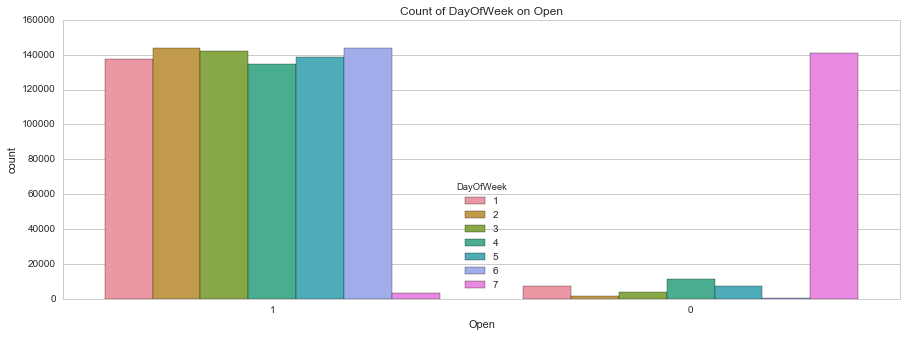

In [14]:
# Count of DayOfWeek on Open
fig,axis1=plt.subplots(1,1,figsize=(15,5))
plt.title('Count of DayOfWeek on Open')
sns.countplot(x='Open',hue='DayOfWeek',data=train_raw_df,order=[1,0])

### 3.2 Sales,Customers,SalesPerCustomer on DayOfWeek

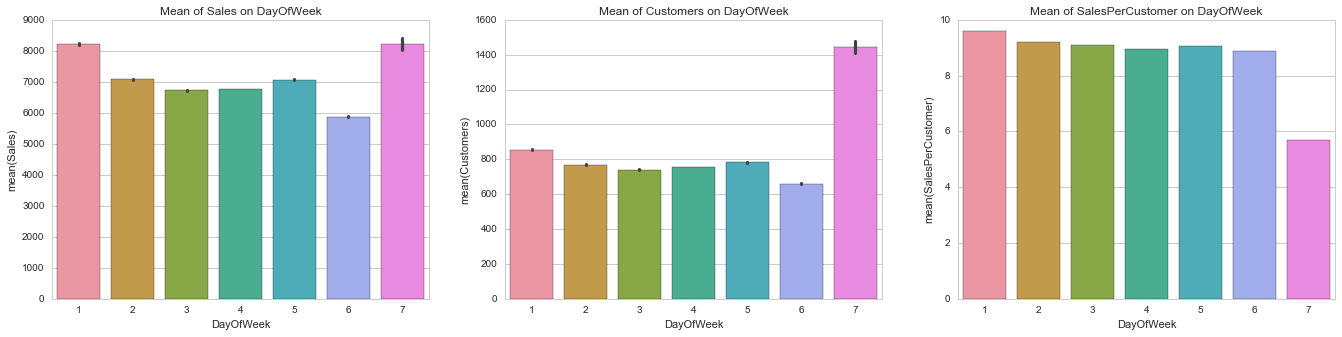

In [15]:
# mean of Sales,Customers,SalesPerCustomer on DayOfWeek(Only the open==1 is calculated)
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(23,5))
sns.barplot(x='DayOfWeek',y='Sales',data=train_raw_df.loc[train_raw_df.Open==1],order=[1,2,3,4,5,6,7],ax=axis1).set_title("Mean of Sales on DayOfWeek")
sns.barplot(x='DayOfWeek',y='Customers',data=train_raw_df.loc[train_raw_df.Open==1],order=[1,2,3,4,5,6,7],ax=axis2).set_title("Mean of Customers on DayOfWeek")

#calc the SalesPerCustomer
temp=(train_raw_df.loc[train_raw_df.Open==1])[['Sales','Customers','DayOfWeek']].groupby('DayOfWeek').sum()
temp['SalesPerCustomer']=temp['Sales']/temp['Customers']
sns.barplot(x=temp.index,y='SalesPerCustomer',data=temp,order=[1,2,3,4,5,6,7],ax=axis3).set_title("Mean of SalesPerCustomer on DayOfWeek")

### 3.3 Sales,Customers,SalesPerCustomer on Promo

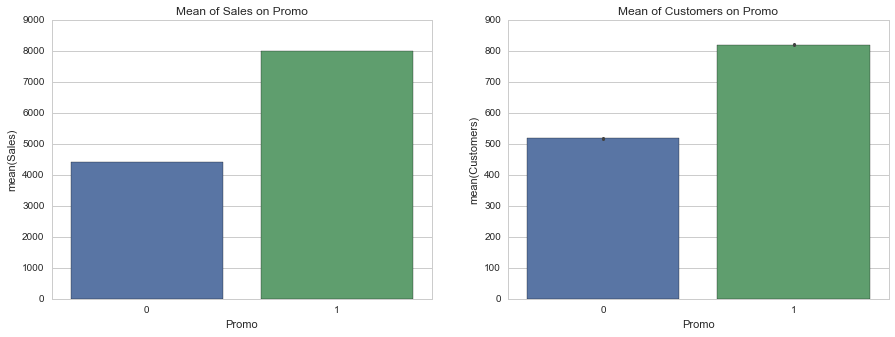

In [16]:
# Sales,Customers on Promo vs Non-Promo
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Promo',y='Sales',data=train_raw_df,order=[0,1],ax=axis1).set_title("Mean of Sales on Promo")
sns.barplot(x='Promo',y='Customers',data=train_raw_df,order=[0,1],ax=axis2).set_title("Mean of Customers on Promo")

(array([0, 1]), <a list of 2 Text xticklabel objects>)

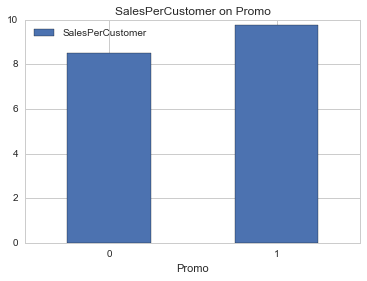

In [17]:
# SalesPerCustomers on Promo vs Non-Promo
temp=(train_raw_df.loc[train_raw_df.Open==1])[['Sales','Customers','Promo']].groupby('Promo').sum()
temp['SalesPerCustomer']=temp['Sales']/temp['Customers']
temp.plot(kind='bar', x=temp.index,y='SalesPerCustomer',title='SalesPerCustomer on Promo')
plt.xticks(rotation='horizontal')

### 3.4 Count of StateHoliday & Average Sales/Customers of StateHoliday 

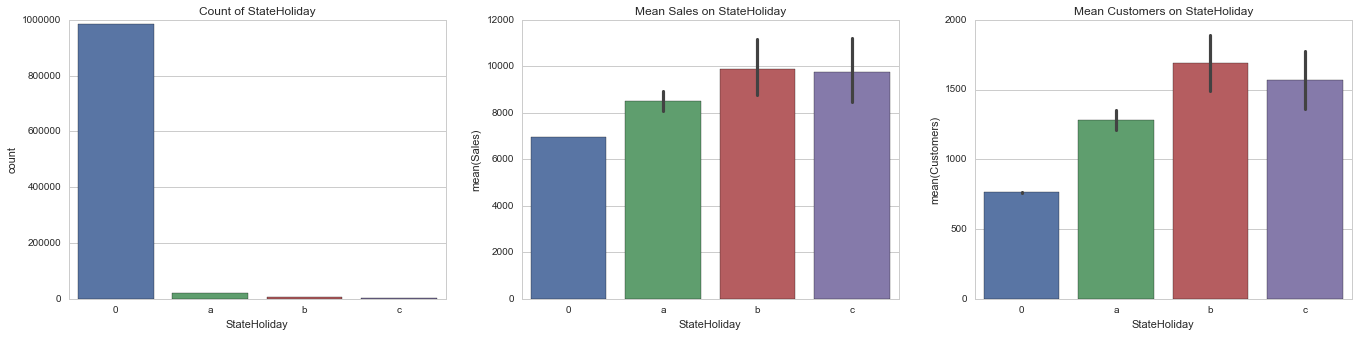

In [18]:
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(23,5))

#Count of StateHoliday
sns.countplot(x='StateHoliday',data=train_raw_df,ax=axis1).set_title("Count of StateHoliday")

#Average Sales of StateHoliday 
mask=(train_raw_df['Open']==1)
sns.barplot(x='StateHoliday',y='Sales',data=train_raw_df[mask],ax=axis2).set_title("Mean Sales on StateHoliday")
sns.barplot(x='StateHoliday',y='Customers',data=train_raw_df[mask],ax=axis3).set_title("Mean Customers on StateHoliday")

### 3.5 Count of SchoolHoliday & Average Sales/Customers of SchoolHoliday 

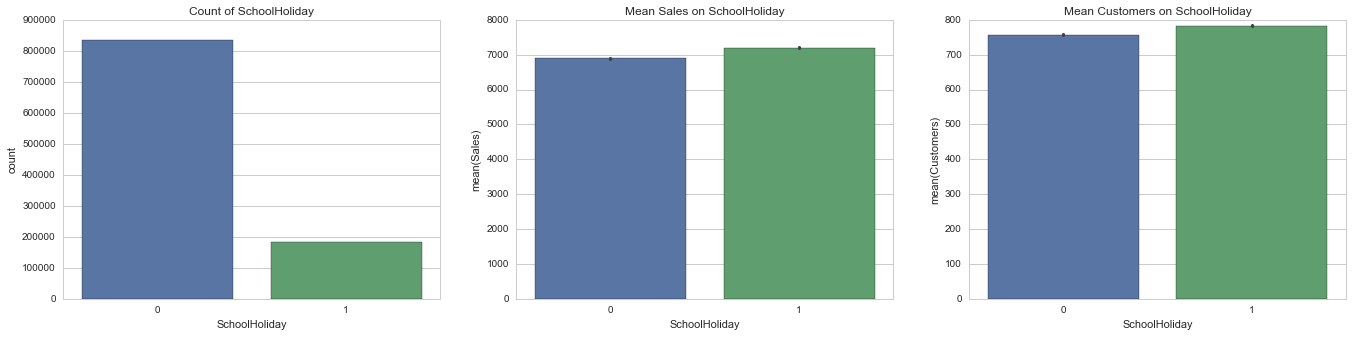

In [19]:
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(23,5))

#Count of SchoolHoliday
sns.countplot(x='SchoolHoliday',data=train_raw_df,ax=axis1).set_title("Count of SchoolHoliday")

#Average Sales of SchoolHoliday 
mask=(train_raw_df['Open']==1)
sns.barplot(x='SchoolHoliday',y='Sales',data=train_raw_df[mask],ax=axis2).set_title("Mean Sales on SchoolHoliday")
sns.barplot(x='SchoolHoliday',y='Customers',data=train_raw_df[mask],ax=axis3).set_title("Mean Customers on SchoolHoliday")

### 3.6 Sales/Customers distribution & change over time

#### 3.6.1 Sales/Customers distribution

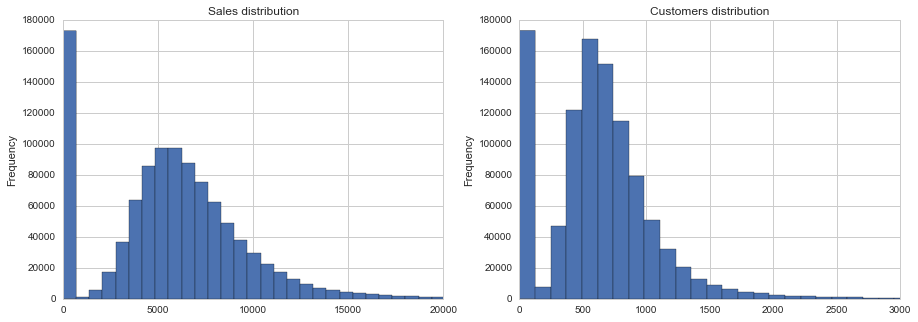

In [20]:
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))
#Sales
_ =train_raw_df['Sales'].plot(kind='hist',bins=60,xlim=(0,20000),ax=axis1,title='Sales distribution')
#Customers
_ =train_raw_df['Customers'].plot(kind='hist',bins=60,xlim=(0,3000),ax=axis2,title='Customers distribution')

#### 3.6.2 Boxplot of Sales/Customers

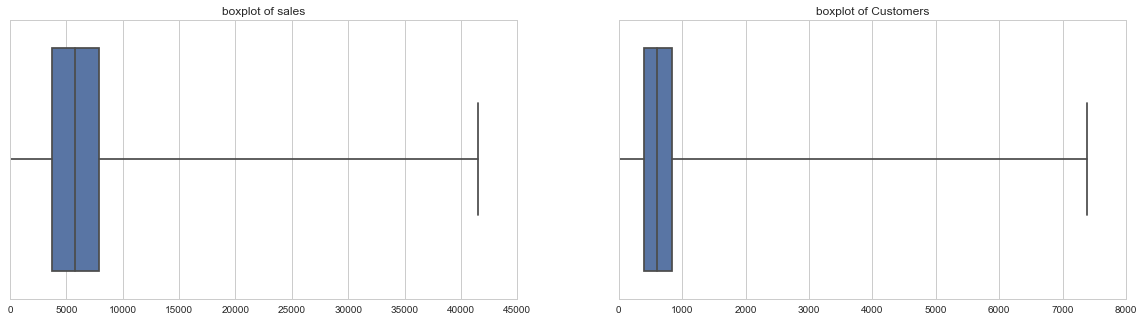

In [21]:
# plot boxplot of sales
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(20,5))
_ =sns.boxplot([train_raw_df['Sales']],whis=np.inf,ax=axis1).set_title('boxplot of sales')
_ =sns.boxplot([train_raw_df['Customers']],whis=np.inf,ax=axis2).set_title('boxplot of Customers')

#### 3.6.3 Sales/Customer Average over year

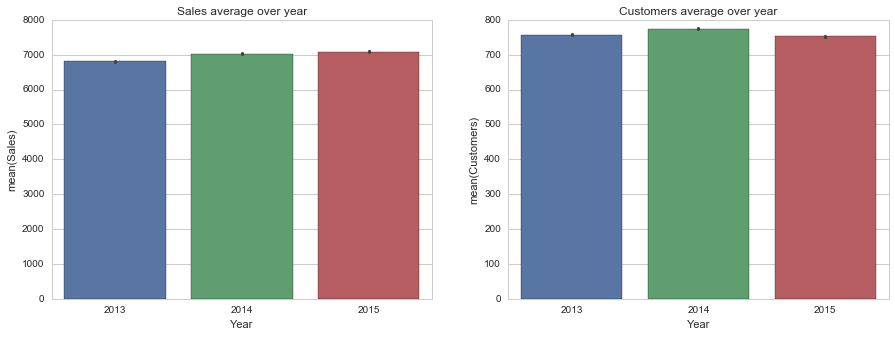

In [22]:
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))

mask=(train_raw_df['Open']==1)
_ =sns.barplot(x='Year',y='Sales',data=train_raw_df[mask],ax=axis1).set_title("Sales average over year")

_ =sns.barplot(x='Year',y='Customers',data=train_raw_df[mask],ax=axis2).set_title("Customers average over year")

#### 3.6.4 Sales over month

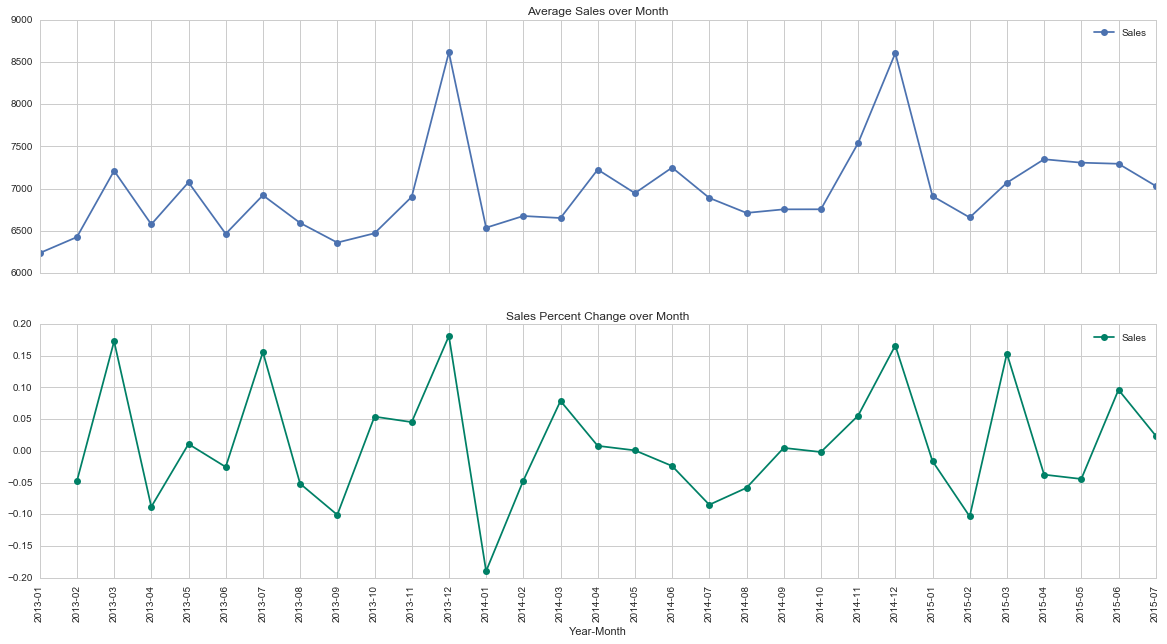

In [23]:
#Group by Year-Month and get average sales and percent change
mask=(train_raw_df['Open']==1)
average_sales=train_raw_df[mask].groupby('Year-Month')['Sales'].mean()
pct_change_sales=train_raw_df[mask].groupby('Year-Month')['Sales'].sum().pct_change()

fig,(axis1,axis2)=plt.subplots(2,1,sharex=True,figsize=(20,10))

#plot average sales over time(year-month)
ax1=average_sales.plot(legend=True,ax=axis1,marker='o',title='Average Sales over Month')
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(),rotation=90)

#plot percent change for sales over time
ax2=pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap='summer',title='Sales Percent Change over Month')


#### 3.6.4 Customers over month

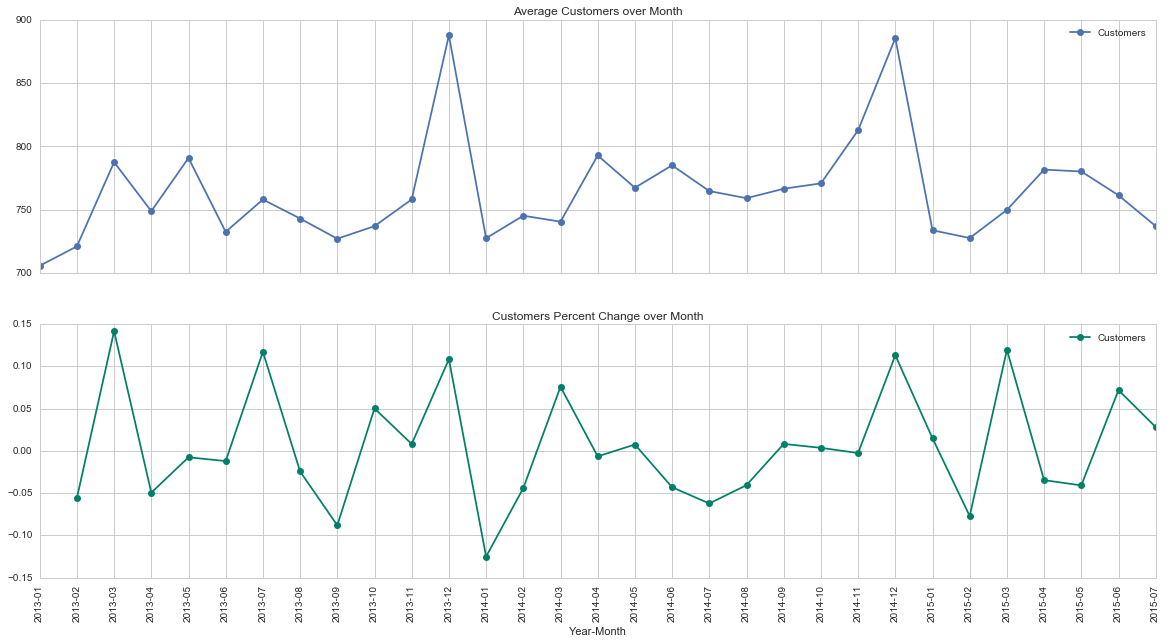

In [24]:
#Group by Year-Month and get average sales and percent change
mask=(train_raw_df['Open']==1)
average_customers=train_raw_df[mask].groupby('Year-Month')['Customers'].mean()
pct_change_customers=train_raw_df[mask].groupby('Year-Month')['Customers'].sum().pct_change()

fig,(axis1,axis2)=plt.subplots(2,1,sharex=True,figsize=(20,10))

#plot average sales over time(year-month)
ax1=average_customers.plot(legend=True,ax=axis1,marker='o',title='Average Customers over Month')
ax1.set_xticks(range(len(average_customers)))
ax1.set_xticklabels(average_customers.index.tolist(),rotation=90)

#plot percent change for sales over time
ax2=pct_change_customers.plot(legend=True,ax=axis2,marker='o',rot=90,colormap='summer',title='Customers Percent Change over Month')


### 3.7 StoreType: count & average sales/customers

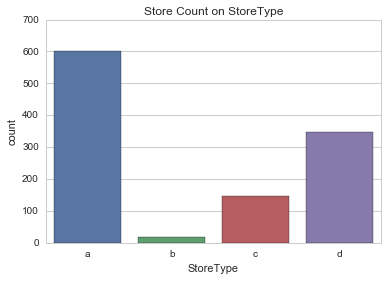

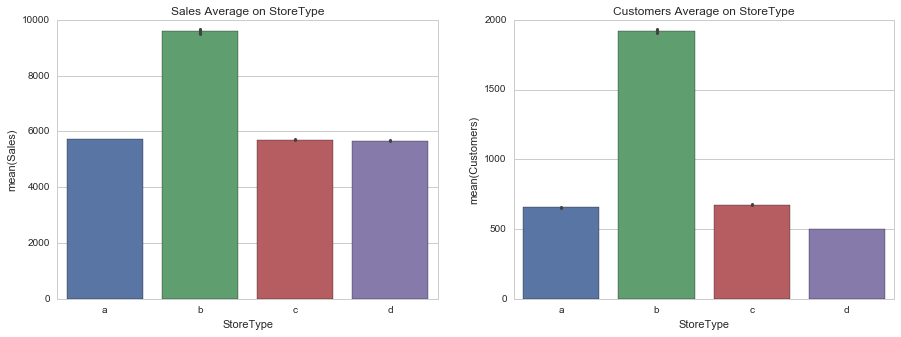

In [25]:
#count of StoreType
_ =sns.countplot(x='StoreType',order=['a','b','c','d'],data=store_raw_df).set_title('Store Count on StoreType')
# average sales/customers on StoreType
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))
mask=(train_raw_df['Open']==1)
sns.barplot(x='StoreType',y='Sales',data=train_store_raw_df[mask],order=['a','b','c','d'],ax=axis1).set_title('Sales Average on StoreType')
sns.barplot(x='StoreType',y='Customers',data=train_store_raw_df[mask],order=['a','b','c','d'],ax=axis2).set_title('Customers Average on StoreType')

### 3.8 Assortment: count & average sales/customers

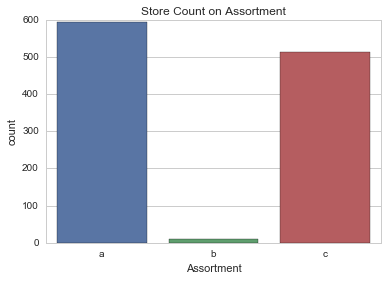

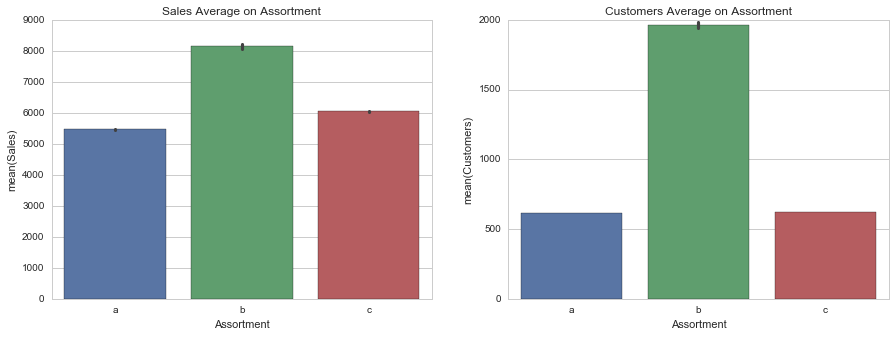

In [26]:
#count of Assortment
_ =sns.countplot(x='Assortment',order=['a','b','c'],data=store_raw_df).set_title('Store Count on Assortment')
# average sales/customers on Assortment
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))
mask=(train_raw_df['Open']==1)
sns.barplot(x='Assortment',y='Sales',data=train_store_raw_df[mask],order=['a','b','c'],ax=axis1).set_title('Sales Average on Assortment')
sns.barplot(x='Assortment',y='Customers',data=train_store_raw_df[mask],order=['a','b','c'],ax=axis2).set_title('Customers Average on Assortment')

### 3.9 Competition: 
#### 3.9.1 Competition Distance

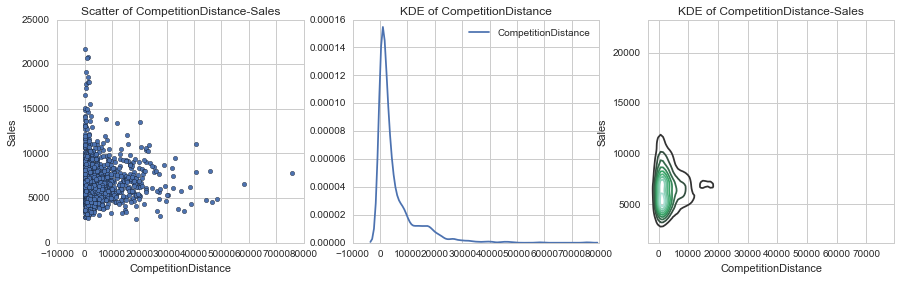

In [27]:
# Plot CompetitionDistance vs Sales
fig,(axis1,axis2,axis3)=plt.subplots(1,3,figsize=(23,5))
mask=(train_store_raw_df['Open']==1)&(train_store_raw_df['InCompetitionToday']==1)
temp=(train_store_raw_df.loc[mask,['Store','Sales','CompetitionDistance']]).groupby('Store').mean()
temp.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4),ax=axis1).set_title('Scatter of CompetitionDistance-Sales')

sns.kdeplot(temp['CompetitionDistance'],ax=axis2).set_title('KDE of CompetitionDistance')
sns.kdeplot(temp['CompetitionDistance'],temp['Sales'],ax=axis3).set_title('KDE of CompetitionDistance-Sales')

#### 3.9.2 the Competition's effect on Sales

In [28]:
# 挑选出Competition出现在train数据时间段范围内
mask=(train_store_raw_df.CompetitionSinceDate>train_store_raw_df.Date_time.min())&(train_store_raw_df.CompetitionSinceDate<train_store_raw_df.Date_time.max())
temp_store_list=train_store_raw_df[mask].Store.unique()
temp_store_list

array([   5,    6,    7,    8,   14,   28,   30,   33,   37,   45,   47,
         51,   52,   53,   54,   57,   75,   84,   95,  103,  106,  110,
        116,  120,  122,  126,  131,  133,  137,  138,  159,  166,  169,
        170,  181,  185,  189,  191,  197,  213,  214,  219,  221,  225,
        230,  246,  249,  261,  262,  263,  264,  266,  268,  269,  270,
        275,  276,  280,  286,  301,  304,  315,  317,  318,  321,  326,
        336,  347,  355,  361,  369,  375,  380,  386,  391,  395,  403,
        413,  416,  423,  428,  432,  447,  449,  452,  461,  488,  489,
        490,  496,  506,  513,  518,  523,  524,  525,  539,  550,  551,
        555,  556,  560,  563,  578,  581,  585,  595,  598,  599,  601,
        604,  608,  626,  629,  630,  635,  646,  647,  653,  661,  675,
        677,  683,  685,  706,  715,  718,  730,  740,  745,  752,  770,
        774,  784,  788,  800,  801,  810,  814,  819,  828,  837,  839,
        859,  872,  878,  882,  901,  902,  903,  9

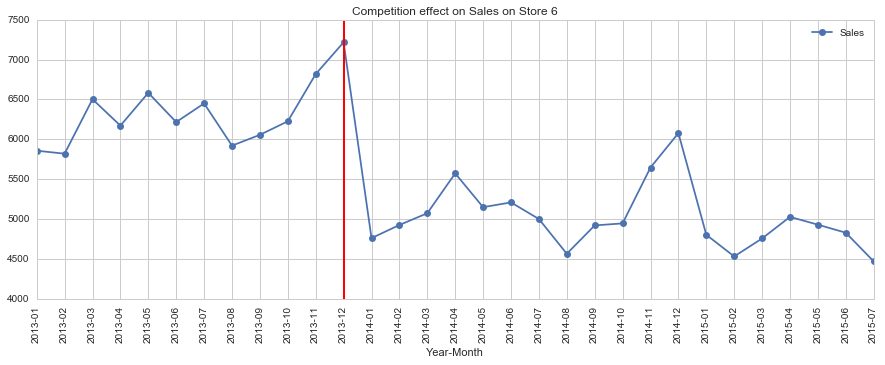

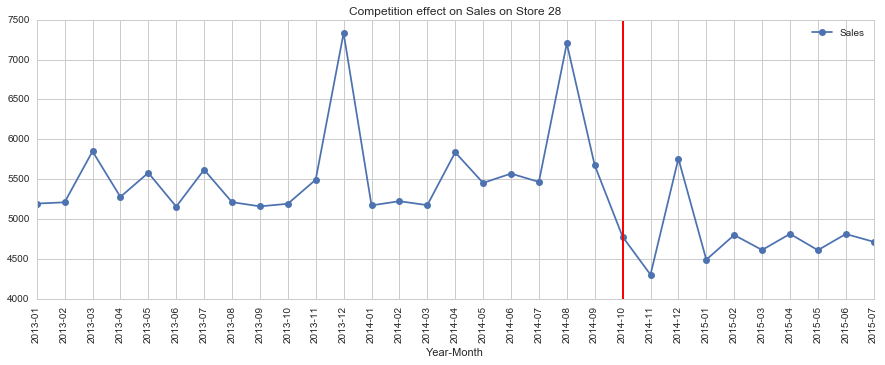

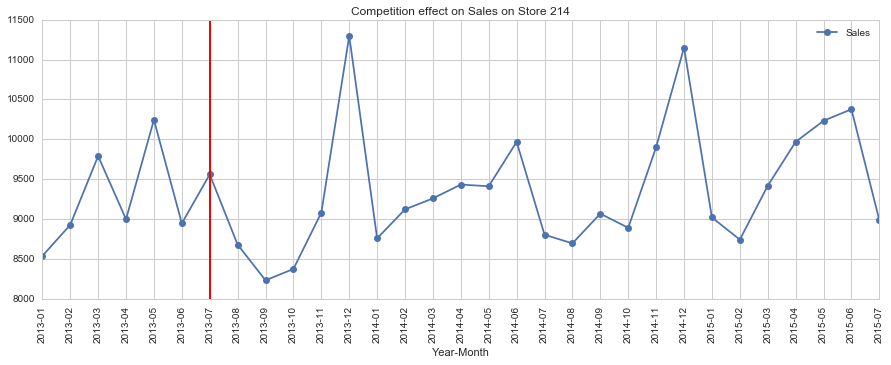

In [29]:
# 挑出三个store_id，并绘制出销售额Sales与Competition的关系
picked_order=[1,5,40]
picked_store=list (temp_store_list[i] for i in picked_order)
mask=(train_store_raw_df['Open']==1)
for ii in picked_store:
    mask=(train_store_raw_df['Open']==1)&(train_store_raw_df['Store']==ii)
    store_id_data=train_store_raw_df.loc[mask]
    store_sell_data=store_id_data[['Year-Month','Sales']].groupby('Year-Month')['Sales'].mean()
    ax1=store_sell_data.plot(legend=True,marker='o',title='Competition effect on Sales on Store {}'.format(ii),figsize=(15,5))
    _=ax1.set_xticks(range(len(store_sell_data)) )
    _=ax1.set_xticklabels(store_sell_data.index.tolist(),rotation=90)
    # Get year and month when competition started
    m=store_id_data.CompetitionOpenSinceMonth.values[0]
    y=store_id_data.CompetitionOpenSinceYear.values[0]

    plt.axvline(x=(y-2013)*12+(m-1),linewidth=2,color='red')
    plt.show()

### 3.10 Promo2
#### 3.10.1 Sales/Customers on InPromo2Today

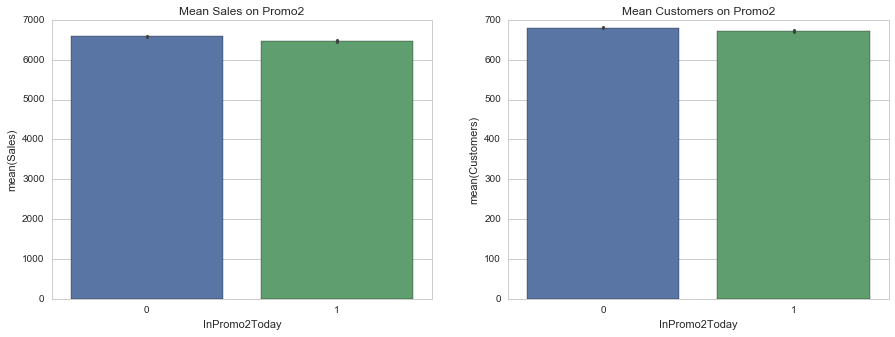

In [30]:
#为研究Promo2的影响，只选取那些Promo2=1的store在Open=1,Promo2开始后的数据进行分析
mask=(train_store_raw_df['Promo2']==1)&(train_store_raw_df['DaysCountSincePromo2']>0)&(train_store_raw_df['Open']==1)
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='InPromo2Today',y='Sales',ax=axis1,data=train_store_raw_df[mask]).set_title('Mean Sales on Promo2')
sns.barplot(x='InPromo2Today',y='Customers',ax=axis2,data=train_store_raw_df[mask]).set_title('Mean Customers on Promo2')

#### 3.10.2 Sales/Customers on Promo2 

NameError: name 'store_sell_data' is not defined

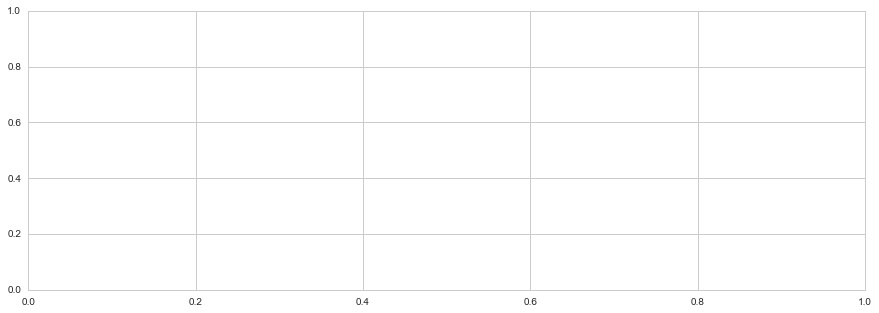

In [99]:
#选取那些Promo2SinceDate在train开始前之前的数据进行分析
mask1=(pd.to_datetime(train_store_raw_df.Promo2SinceDate)>train_store_raw_df.Date_time.min()
     )&(train_store_raw_df.Open==1)&(train_store_raw_df.Promo2==1)
Interval=train_store_raw_df['PromoInterval'].unique()

mon_map={
    'Jan,Apr,Jul,Oct':0,
    'Feb,May,Aug,Nov':1,
    'Mar,Jun,Sept,Dec':2
  }
for ii in Interval:
    if ii!='':
        fig,(axis1)=plt.subplots(1,1,figsize=(15,5))
        mask=mask1&(train_store_raw_df['PromoInterval']==ii)
        temp=train_store_raw_df.loc[mask][['Year-Month','Sales']].groupby('Year-Month').mean()
        
        x_list=range(len(store_sell_data))
        markers_on=np.array(x_list)[np.mod(x_list,3)==mon_map[ii]]
        ax1=temp.plot(linestyle='-', marker='o', color='b',linewidth=1,legend=True,markevery=markers_on,title='Promo2 effect on Sales on Store {}'.format(ii),ax=axis1,ylim=[5000,8500])
        _=ax1.set_xticks(range(len(store_sell_data)) )
        _=ax1.set_xticklabels(store_sell_data.index.tolist(),rotation=90)
                
        plt.show()
        


## 3. 训练基准模型

### 3.1 从训练集中划分出验证集，基准模型将基于验证集进行度量
- Kaggle没有提供测试集数据的真实标记值, Kaggle Public/Private Leader Board适合作为衡量模型泛化能力的最终验证；当模型训练结束后，可以作为验证模型是否过拟合的工具，同时也可以参考Leader Board的结果和排名来估计模型优化的潜力；
- 本项目在完成过程中，将最后六周的数据作为验证集，用余下的训练集训练模型

In [23]:
mask_train=train_store_raw_df['Date']<'2015-06-15'
mask_valid=train_store_raw_df['Date']>='2015-06-15'
train_store_df=train_store_raw_df[mask_train]
valid_store_df=train_store_raw_df[mask_valid]
benchmark_valid_store_df=valid_store_df.copy()
benchmark_test_store_df=test_store_raw_df.copy()

### 3.2 挑选出最优的特征组合训练基准模型

#### 3.2.1  训练基准模型
- 基准模型采用具有相同特征参数数据子集的中位数；
- 采用的特征包含药店编号、星期几，月份、是否促销、当天是否促销2等；
- 将特征组合与对应RMSPE存到dict features_RMSPE

#### 3.2.2 对验证集进行测试
- 利用选好的特征，训练出基准模型
- 将model结果以dict形式进行保存，以便于高效计算
- 使用训练好的基准模型对验证集进行测试：applymap方法可以非常高效地求出映射结果

#### 3.2.3 定义评估函数
本项目采用Kaggle比赛的评估指标：RMSPE（误差百分比的均方差），可表示为
$$
RMSPE= \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\frac{y_i-\hat{y_i}}{y_i})^2}
$$
其中，任何当天销售额为0的数据在评估时将被忽略； $y_i$ 表示某药店在某天的实际销售额，而$\hat{y_i}$ 表示该药店在对应这一天的预测销售额。

#### 3.2.4 求出基准模型在验证集上的RMSPE

In [24]:
#使用训练好的基准模型对验证集进行测试：applymap方法可以非常高效地求出映射结果
def predict_benchmark_model(df,features,map_dict):
    mask_0=df['Open']==0
    mask_1=df['Open']!=0
    df.loc[mask_0,'Sales_Predicted']=0
    df['tuple_map']=df[features].apply(tuple,axis=1)
    df.loc[mask_1,'Sales_Predicted']=df.loc[mask_1,'tuple_map'].map(map_dict)
    return df

#定义评估函数
def calc_RMSPE(input_df,true_label='Sales',predicted_label='Sales_Predicted'):
    mask=input_df[true_label]>0
    sale=input_df.loc[mask,[true_label,predicted_label]]
    sale['errror']=np.power((sale[true_label]-sale[predicted_label])/sale[true_label],2.0)
    return np.sqrt(np.sum(sale['errror'])/(len(sale)))

#采用的特征包含药店编号、星期几，月份、是否促销、当天是否促销2等；
features_benchmark=(['Store','DayOfWeek','Promo','Month','InPromo2Today'])
#将特征组合与对应RMSPE存到dict features_RMSPE
features_RMSPE={}

#提取出所有可能的特征组合放入subset
for L in range(2, len(features_benchmark)+1):
    for subset in itertools.combinations(features_benchmark, L):
        valid_df=benchmark_valid_store_df.copy()
        
        features=list(subset)
        features_sales=features+['Sales']
        
        #利用选好的特征，训练出基准模型
        benchmark_model=train_store_df[train_store_df['Open']==1][features_sales].groupby(features).median()
        #将model结果以dict形式进行保存，以便于高效计算
        benchmark_model_dict=benchmark_model['Sales'].to_dict()
        
        valid_df= predict_benchmark_model(valid_df,features,benchmark_model_dict)   
        RMSPE_valid_benchmark=calc_RMSPE(valid_df)
        features_RMSPE[subset]=RMSPE_valid_benchmark

#### 3.2.5 打印features_RMSPE中数值较小的三个

In [91]:
#打印features_RMSPE中数值较小的三个
sorted_RMSPE = sorted(features_RMSPE.items(), key=operator.itemgetter(1))
print("-----------RMSPE较小的三个特征组合与在对应验证集的RMSPE-------------")
for ii in range(3):
    print sorted_RMSPE[ii][0],':',sorted_RMSPE[ii][1]

-----------RMSPE较小的三个特征组合与在对应验证集的RMSPE-------------
('Store', 'DayOfWeek', 'Promo', 'InPromo2Today') : 0.140907493872
('Store', 'DayOfWeek', 'Promo') : 0.141226490165
('Store', 'DayOfWeek', 'Promo', 'Month', 'InPromo2Today') : 0.14656682642


### 3.3 训练基准模型，并在测试集上进行预测，并提交到Kaggle查看结果
- 把RMSPE最小的特征赋给features_benchmark，并使用所有的train_store_raw_df数据训练模型

In [117]:
features_benchmark=list(min(features_RMSPE, key=features_RMSPE.get))
features_benchmark_sales=features_benchmark+['Sales']

benchmark_model=train_store_raw_df[train_store_raw_df['Open']==1][features_benchmark_sales].groupby(features_benchmark).median()
benchmark_model_dict=benchmark_model['Sales'].to_dict()

benchmark_test_store_df= predict_benchmark_model(benchmark_test_store_df,features_benchmark,benchmark_model_dict)   

benchmark_test_output=benchmark_test_store_df.ix[:,['Id','Sales_Predicted']].rename(columns={'Sales_Predicted': 'Sales'})
benchmark_test_output.sort_values(by='Id',inplace=True)
path='Capstone_Project_Rossman_Sales_Prediction_1'
filename='benchmark_model_test_'+'features_'+'_'.join(features_benchmark)+'.csv'
benchmark_test_output.to_csv(os.path.join(path, filename),index=False)

#### [Kaggle Leader Board Result](https://www.kaggle.com/c/rossmann-store-sales/submissions):

|    Kaggle Leader Board   | Result |
| ---------- | --- |
| Private |  0.14807 |
| Public       |  0.14044 |

